## Scientific Python


### Matrices
Dealing with vectors and matrices efficiently requires the **numpy** library. For the sake of brevity we will import this with a shorter name:

In [1]:
import numpy as np

The numpy supports arrays and matrices with many of the features that would be familiar to matlab users. See here quick summary of [numpy for matlab users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

Appart from the convenience, the numpy methods are also much faster at performing operations on matrices or arrays than performing arithmetic with numbers stored in lists. 


In [2]:
x = np.array([1,2,3,4,5])
y = np.array([2*i for i in x])
x+y # element wise addition

array([ 3,  6,  9, 12, 15])

In [3]:
X = x[:4].reshape(2,2) # turn into a matrix/table
2*X # multiply by a scalar

array([[2, 4],
       [6, 8]])

However watch out: array is not quite a matrix. For proper matrix operations you need to use the matrix type. Unlike **array**s that can have any number of dimensions, matrices are limited to 2 dimension. However matrix multiplication does what you would expect from a linear algebra point of view, rather than an element-wise multiplication:

In [4]:
Y = np.matrix(X)
print("X=Y=\n",Y)
print("array X*X=\n",X*X,'\nmatrix Y*Y=\n',Y*Y)

X=Y=
 [[1 2]
 [3 4]]
array X*X=
 [[ 1  4]
 [ 9 16]] 
matrix Y*Y=
 [[ 7 10]
 [15 22]]


Much more information on how to use numpy is available at [quick start tutorial](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html)

### Plotting
There are lots of configuration options for the **matplotlib** library that we are using here. For more information see [http://matplotlib.org/users/beginner.html]

To get started we need the following bit of 'magic' to make the plotting work:

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now we can try something simple:

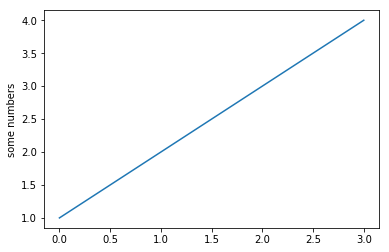

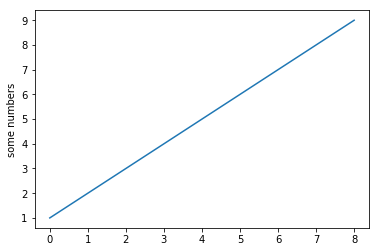

In [6]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()
plt.plot(range(1,10))
plt.ylabel('some numbers')
plt.show()


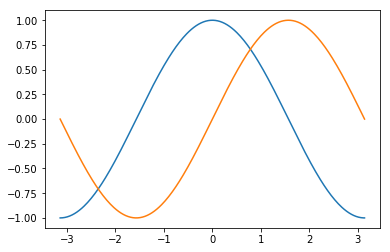

In [7]:
# A slightly more complicated plot with the help of numpy
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

Annotating plots can be done with methods like **text()** to place a label and **annotate()**. For example:

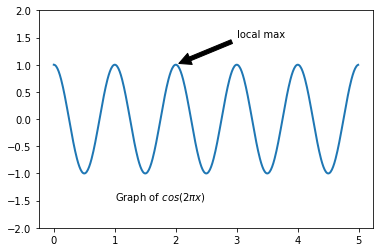

In [8]:
t = np.arange(0.0, 5.0, 0.01)
line, = plt.plot(t, np.cos(2*np.pi*t), lw=2)
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
# text can include basic LaTeX commands - but need to mark
# string as raw (r"") or escape '\' (by using '\\')
plt.text(1,-1.5,r"Graph of $cos(2\pi x)$") 
plt.ylim(-2,2)
plt.show()

Here is an example of how to create a basic surface contour plot.
    

/usr/local/software/jureca/Stages/Devel-2019a/software/Jupyter/2019a-rc30-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  import sys
/usr/local/software/jureca/Stages/Devel-2019a/software/Jupyter/2019a-rc30-gcccoremkl-8.3.0-2019.3.199-Python-3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  


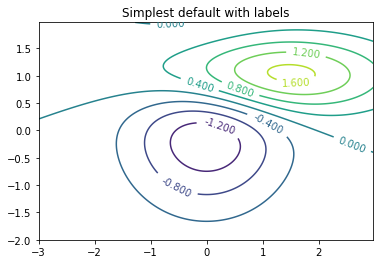

In [9]:
import matplotlib.mlab as mlab # for bivariate_normal to define our surface

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y) # define mesh of points
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10.0 * (Z2 - Z1) # difference of Gaussians

# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')
plt.show()